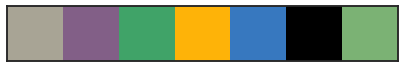

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.ticker as ticker
import statsmodels.formula.api as smf
from pprint import pprint
import re as re

from statsmodels.regression.mixed_linear_model import MixedLMResults

import scipy as sp
#from scipy.stats import nanmean
#from scipy.stats import nanstd
import copy
import scipy.stats as stats
import string

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pprint import pprint
import seaborn as sns
sns.set(style="white", context="talk")
custom_palette = [ "greyish", "dusty purple", "greenish", "amber", "windows blue", "black","faded green"]  
                     #"green blue", "dull green", "faded green",  
sns.set_palette(sns.xkcd_palette(custom_palette))
current_palette = sns.color_palette()
%matplotlib inline
sns.palplot(current_palette)

import warnings
warnings.filterwarnings('ignore')


In [2]:
round_data = pd.read_csv('./all_studies_round_data.csv')

round_data['group'] = 1 #this is only for the crossed mixed effect model

game_rounds = pd.read_csv('./all_studies_game_data.csv')
#round_data = round_data[round_data.round_index > 3]
#print(round_data.size)
conditions = ['dynamic_full_feedback',
              'dynamic',         
              'dynamic_self_feedback',
              'dynamic_no_feedback',
              'static',
              'solo_feedback',
              'solo_no_feedback'
             ]


colors ={'dynamic_no_feedback':'#196FFF',
         'dynamic_self_feedback':'#000000',
         'dynamic_full_feedback':'#E89468',
         'dynamic': '#81B200',
         'static':'#9B59B6',
         'solo_feedback': '#95A5A6',
         'solo_no_feedback': '#95A5A6'
        }


linestyles ={'dynamic_no_feedback':'-.',
         'dynamic_self_feedback':':',
         'dynamic_full_feedback':'-',
         'dynamic': '-',
         'static':'--',
         'solo_feedback': '-',
         'solo_no_feedback': '-'
        }

markers ={'dynamic_no_feedback':'d',
         'dynamic_self_feedback':'^',
         'dynamic_full_feedback':'p',
         'dynamic': 'o',
         'static':'*',
         'solo_feedback': 'H',
         'solo_no_feedback': 'h'
        }

#markers = ['s','o','*']
#linestyles = ['--','-',':','-.']
tick_size = 25
label_size = 35




studies = [1,2]
#crossed model with no independent groups https://stackoverflow.com/questions/50052421/mixed-models-with-two-random-effects-statsmodels
# this is used as a variance component for the individual level stuff
vcf = {"player_id": "0 + C(player_id)", "game_id": "0 + C(game_id)"} 


# Statistical Tests for study 1

## Table S1: Solo vs Static (individual)

In [3]:
#### Study 1 Solo vs Static

print("solo vs static (individual): over all")

forumla = "revised_error ~ C(condition, Treatment('solo_feedback'))"
data = round_data[(round_data.study==1) &
                  (round_data.condition != 'dynamic') &
                  (round_data.revised_error.notnull())]

model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'static'].revised_error.mean() - data[data.condition == 'solo_feedback'].revised_error.mean() ) / data[data.condition == 'static'].revised_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print (' ---- ')
#print(model.summary())

print('=============================')


print("solo vs static (individual): first half")

forumla = "revised_error ~ C(condition, Treatment('solo_feedback'))"
data = round_data[(round_data.study==1) &
                  (round_data.condition != 'dynamic') &
                  (round_data.revised_error.notnull()) &
                  (round_data.half==1)
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'static'].revised_error.mean() - data[data.condition == 'solo_feedback'].revised_error.mean() ) / data[data.condition == 'static'].revised_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print(model.summary())

print('=============================')

print("solo vs static (individual): second half")

forumla = "revised_error ~ C(condition, Treatment('solo_feedback'))"
data = round_data[(round_data.study==1) &
                  (round_data.condition != 'dynamic') &
                  (round_data.revised_error.notnull()) &
                  (round_data.half==2)
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'static'].revised_error.mean() - data[data.condition == 'solo_feedback'].revised_error.mean() ) / data[data.condition == 'static'].revised_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print(model.summary())


print('=============================')

print("solo vs static (individual): adapted periods")
forumla = "revised_error ~ C(condition, Treatment('solo_feedback'))"
data = round_data[(round_data.study==1) &
                  (round_data.condition != 'dynamic') &
                  (round_data.revised_error.notnull()) &
                  (round_data.quarter.isin([2,4]))
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'static'].revised_error.mean() - data[data.condition == 'solo_feedback'].revised_error.mean() ) / data[data.condition == 'static'].revised_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')


solo vs static (individual): over all
 β:  -0.05590339996708633 , t-statistic -4.62391442379746 , pvalue  3.765652717457147e-06  ci  -0.07959948092933777 -0.03220731900483489 reduced error by  -28.503128750347077
solo vs static (individual): first half
 β:  -0.05099855368097738 , t-statistic -3.385275465027136 , pvalue  0.0007110685716441642  ci  -0.08052505145375081 -0.02147205590820395 reduced error by  -26.789866111665937
solo vs static (individual): second half
 β:  -0.0608151390168452 , t-statistic -3.2852069016354104 , pvalue  0.0010190750789004176  ci  -0.09709762768703412 -0.024532650346656283 reduced error by  -30.127750556294234
solo vs static (individual): adapted periods
 β:  -0.056947868161805124 , t-statistic -5.226517529439821 , pvalue  1.727324500467752e-07  ci  -0.07830353567172281 -0.03559220065188744 reduced error by  -32.59577062475157


## Table S1: Solo vs Static (Group)

In [4]:
#### Study 1 Solo vs Static

print("solo vs static (group): over all")
forumla = "revised_wisdom_error ~ C(condition, Treatment('solo_feedback'))"
data = game_rounds[(game_rounds.study==1) &
                  (game_rounds.condition != 'dynamic')]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'static'].revised_wisdom_error.mean() - data[data.condition == 'solo_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'static'].revised_wisdom_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print (' ---- ')
#print(model.summary())

print('=============================')


print("solo vs static (group): first half")

forumla = "revised_wisdom_error ~ C(condition, Treatment('solo_feedback'))"
data = game_rounds[(game_rounds.study==1) &
                  (game_rounds.condition != 'dynamic')&
                   (game_rounds.half==1)
                  ]


model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'static'].revised_wisdom_error.mean() - data[data.condition == 'solo_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'static'].revised_wisdom_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print(model.summary())

print('=============================')

print("solo vs static (group): second half")

forumla = "revised_wisdom_error ~ C(condition, Treatment('solo_feedback'))"
data = game_rounds[(game_rounds.study==1) &
                  (game_rounds.condition != 'dynamic') &
                  (game_rounds.half==2)
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'static'].revised_wisdom_error.mean() - data[data.condition == 'solo_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'static'].revised_wisdom_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print(model.summary())


print('=============================')

print("solo vs static (group): adapted periods")
forumla = "revised_wisdom_error ~ C(condition, Treatment('solo_feedback'))"
data = game_rounds[(game_rounds.study==1) &
                  (game_rounds.condition != 'dynamic') &
                  (game_rounds.quarter.isin([2,4]))
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'static'].revised_wisdom_error.mean() - data[data.condition == 'solo_feedback'].revised_wisdom_error.mean() ) / data[data.condition == 'static'].revised_wisdom_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')


solo vs static (group): over all
 β:  -0.045274688755688665 , t-statistic -7.031058610606564 , pvalue  2.0497237210728344e-12  ci  -0.057895371399202436 -0.032654006112174894 reduced error by  -28.2985764233299
solo vs static (group): first half
 β:  -0.04030900011099926 , t-statistic -5.536935344755031 , pvalue  3.0781011574815904e-08  ci  -0.05457757713984571 -0.02604042308215282 reduced error by  -26.114027853710592
solo vs static (group): second half
 β:  -0.05024037740037788 , t-statistic -6.059510188310383 , pvalue  1.3653667989108753e-09  ci  -0.06649075527157965 -0.03398999952917611 reduced error by  -30.33456202851823
solo vs static (group): adapted periods
 β:  -0.043781866189367205 , t-statistic -6.572089581670327 , pvalue  4.96139965178391e-11  ci  -0.05683873034813334 -0.03072500203060107 reduced error by  -31.182033320777926


## Table S1: Static vs Dynamic (individual)

In [5]:
#### Study 1 Static vs Dynamic

print("static vs dynamic (individual): over all")

forumla = "revised_error ~ C(condition, Treatment('static'))"
data = round_data[(round_data.study==1) &
                  (round_data.condition != 'solo_feedback') &
                  (round_data.revised_error.notnull())]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic'].revised_error.mean() - data[data.condition == 'static'].revised_error.mean() ) / data[data.condition == 'dynamic'].revised_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print(model.summary())

print('=============================')


print("static vs dynamic: first half")

forumla = "revised_error ~ C(condition, Treatment('static'))"
data = round_data[(round_data.study==1) &
                  (round_data.condition != 'solo_feedback') &
                  (round_data.revised_error.notnull()) &
                  (round_data.half==1)
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic'].revised_error.mean() - 
                 data[data.condition == 'static'].revised_error.mean() ) / data[data.condition == 'dynamic'].revised_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print(model.summary())

print('=============================')


print("static vs dynamic (individual): second half")

forumla = "revised_error ~ C(condition, Treatment('static'))"
data = round_data[(round_data.study==1) &
                  (round_data.condition != 'solo_feedback') &
                  (round_data.revised_error.notnull()) &
                  (round_data.half==2)
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic'].revised_error.mean() - data[data.condition == 'static'].revised_error.mean() ) / data[data.condition == 'dynamic'].revised_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print(model.summary())


print('=============================')

print("static vs dynamic (individual): adapted periods")
forumla = "revised_error ~ C(condition, Treatment('static'))"
data = round_data[(round_data.study==1) &
                  (round_data.condition != 'solo_feedback') &
                  (round_data.revised_error.notnull()) &
                  (round_data.quarter.isin([2,4]))
                 ]
model = smf.mixedlm(forumla,data=data,groups='group',
                    vc_formula=vcf,re_formula="0").fit(method='powell')

reduced_error = (data[data.condition == 'dynamic'].revised_error.mean() - data[data.condition == 'static'].revised_error.mean() ) / data[data.condition == 'dynamic'].revised_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')


static vs dynamic (individual): over all
 β:  -0.03774506409512676 , t-statistic -4.6436019970804985 , pvalue  3.4238684100355427e-06  ci  -0.05367643940832459 -0.021813688781928936 reduced error by  -16.817912328325743
static vs dynamic: first half
 β:  -0.03753281968301293 , t-statistic -3.8686134974161375 , pvalue  0.00010945598471044681  ci  -0.05654815291960387 -0.018517486446421993 reduced error by  -21.013423885053506
static vs dynamic (individual): second half
 β:  -0.0367214336802311 , t-statistic -3.169763853087982 , pvalue  0.0015256287261661103  ci  -0.05942744296348207 -0.014015424396980131 reduced error by  -13.113329240234716
static vs dynamic (individual): adapted periods
 β:  -0.05328092687490666 , t-statistic -6.555546720448231 , pvalue  5.543838844989161e-11  ci  -0.06921074969380178 -0.03735110405601154 reduced error by  -35.72598333131


## Table S1: Static vs Dynamic (Group)

In [6]:
#### Study 1 Static vs Dynamic

print("static vs dynamic (group): over all")
forumla = "revised_wisdom_error ~ C(condition, Treatment('static'))"
data = game_rounds[(game_rounds.study==1) &
                  (game_rounds.condition != 'solo_feedback')]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic'].revised_wisdom_error.mean() - data[data.condition == 'static'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic'].revised_wisdom_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')

print('=============================')


print("static vs dynamic (group): first half")

forumla = "revised_wisdom_error ~ C(condition, Treatment('static'))"
data = game_rounds[(game_rounds.study==1) &
                  (game_rounds.condition != 'solo_feedback') &
                  (game_rounds.half==1)
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic'].revised_wisdom_error.mean() - data[data.condition == 'static'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic'].revised_wisdom_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print(model.summary())

print('=============================')


print("static vs dynamic (group): second half")

forumla = "revised_wisdom_error ~ C(condition, Treatment('static'))"
data = game_rounds[(game_rounds.study==1) &
                  (game_rounds.condition != 'solo_feedback') &
                  (game_rounds.half==2)
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic'].revised_wisdom_error.mean() - data[data.condition == 'static'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic'].revised_wisdom_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')
#print(model.summary())


print('=============================')

print("static vs dynamic (group): adapted periods")
forumla = "revised_wisdom_error ~ C(condition, Treatment('static'))"
data = game_rounds[(game_rounds.study==1) &
                  (game_rounds.condition != 'solo_feedback') &
                  (game_rounds.quarter.isin([2,4]))
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['game_id']).fit(method='powell')

reduced_error = (data[data.condition == 'dynamic'].revised_wisdom_error.mean() - data[data.condition == 'static'].revised_wisdom_error.mean() ) / data[data.condition == 'dynamic'].revised_wisdom_error.mean()

print(" β: ",model.params[1], ', t-statistic',model.tvalues[1], ', pvalue ', model.pvalues[1], 
      ' ci ', model.conf_int()[0][1], model.conf_int()[1][1], 'reduced error by ', reduced_error*100)#print (' ---- ')

static vs dynamic (group): over all
 β:  -0.03058689404913712 , t-statistic -3.2547670891874247 , pvalue  0.0011348539389613855  ci  -0.04900578827183187 -0.012167999826442375 reduced error by  -17.939577047710912
static vs dynamic (group): first half
 β:  -0.028566450790567764 , t-statistic -2.4585553702671272 , pvalue  0.01394972635470743  ci  -0.05133966769377919 -0.005793233887356336 reduced error by  -20.263780759173873
static vs dynamic (group): second half
 β:  -0.02942021162712377 , t-statistic -2.2244684708334828 , pvalue  0.02611694153403022  ci  -0.05534215925765307 -0.0034982639965944716 reduced error by  -15.852881091865834
static vs dynamic (group): adapted periods
 β:  -0.04301241694950593 , t-statistic -4.441208783157885 , pvalue  8.945494848385462e-06  ci  -0.061994363582762155 -0.0240304703162497 reduced error by  -39.57518431774202
